##### Stock price prediction on one year of NVIDIA prices 

CSV data downloaded from Yahoo Finance: https://finance.yahoo.com/quote/NVDA/history?p=NVDA

Time Period: May 25, 2022 - May 25, 2023

##### Cleaning the CSV data and removing unnecessary columns

In [28]:
import os,csv

INPUT_FNAME = "NVDA.csv"
OUTPUT_FNAME = "NVDA_clean.csv"

inputfile = open(INPUT_FNAME, "r")

outputfile = open(OUTPUT_FNAME, "w")

if os.stat(OUTPUT_FNAME).st_size == 0:
    print(OUTPUT_FNAME, "is empty, proceeding to clean input file")
    reader = csv.reader(inputfile)
    for i, line in enumerate(reader):
        outputfile.write(",".join([line[0], line[4]]))
        outputfile.write("\n")
    outputfile.close()

NVDA_clean.csv is empty, proceeding to clean input file


#### Plot the sanitized data

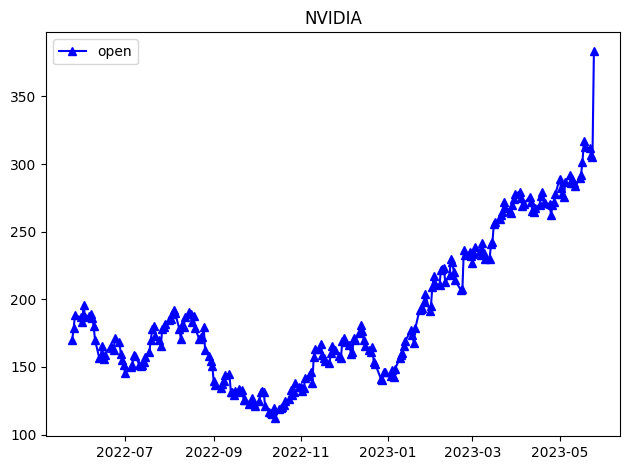

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./NVDA_clean.csv")

data["Date"] = pd.to_datetime(data["Date"])
# date vs open
# date vs close
plt.plot(data["Date"], data["Close"], c="b", label="open", marker="^")
plt.title("NVIDIA")
plt.legend()
plt.tight_layout()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import xgboost as xgb


y = data['Close']
x = data['Date']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, booster='gbtree')

model.fit(x_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Date: datetime64[ns]